In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random


In [19]:
X ,y = make_blobs(1000, centers = 6,random_state=42,n_features=100)

In [20]:
X

array([[  2.00734229,  -9.3752472 ,  -6.33868462, ...,  -5.14736433,
          0.90211549,  -8.42424774],
       [ -2.17159496,   8.60240916,   4.15227261, ...,  -0.3226146 ,
         -9.76050616,  -8.94869737],
       [ -2.66049666,   9.27097136,   3.65072432, ...,  -1.10126355,
         -7.71097887,  -6.01260886],
       ...,
       [  0.89251872,  -9.48048241,  -7.8702232 , ...,  -7.02227269,
          2.39086351,  -8.48006244],
       [  3.23490724,  -8.39129836,  -7.12814615, ...,  -5.56420712,
          1.96192979,  -7.93342678],
       [ -3.05950278,   8.34266276,   4.61432477, ...,  -3.60256975,
        -10.13057921,  -9.16526125]])

In [21]:
points = random.choices(list(X),k=4)
points

[array([ -8.48558007,   0.04728222,   0.64787541,   3.10145097,
          4.13259273,   9.6095203 ,   0.66733495,  -2.02024779,
          5.0399314 ,  -4.16319192,  -1.82473615,  -7.66483606,
         -8.6474857 ,  10.93042957,   6.29391434,   4.06504351,
         -1.01688104,  -5.87547663,  -9.35905822,  -5.68258871,
          1.55464972,   4.0821226 ,   4.01539869,  -3.35924798,
          8.88381515,   5.35876154,   2.54322295,   3.25291835,
         -2.37864588,  -5.23051366,  -2.85306577,   4.22169623,
         -8.64213581,  -8.32350274,  -9.18137144,  -8.11358345,
          6.65821849,   3.73654901,  -0.1784732 ,  -8.45223062,
          1.36492845,  -1.44600946,  -8.83077547,  -0.47997047,
         -2.38747398,   1.50937129,   3.08578703,  -8.67452866,
         -3.26963104,   3.70408763,   0.92460218,   9.10437011,
          2.71523858,  -6.58504278,  -8.35529329,   2.52143826,
         -9.06655487,   2.193936  ,   9.28348457,   1.18299047,
         -2.44592348,   2.29866932,  -1.

In [32]:
class KMeans:
    
    def __init__(self,n_clusters,iters=10):
        self.n_clusters = n_clusters
        self.iters = iters
    def fit(self,X):
        self.X = X
        
        errors = []
        
        #create k seed points 
        points = random.choices(list(X),k=self.n_clusters)
        #create clusters corresponding to the seed points
        self.clusters = []
        
        for point in points:
            cluster = Cluster(point)
            self.clusters.append(cluster)
    
        for _ in range(self.iters):
            
            self.labels_ = []
            for point in X:
                distances = []
                for cluster in self.clusters:
                    dis = cluster.distance(point)
                    distances.append((dis,cluster))
                    
                distance_np = np.array(distances)
                min_index = np.argmin(distance_np[:,0].astype(int))
                selected = self.clusters[min_index]
                selected.points.append(point)
                self.labels_.append(min_index)
                
            for cluster in self.clusters:
                cluster.update_center()
                
            errors.append(self.error())
            
            return errors
            
    def error(self):
        total = 0
        for point , label in zip(self.X,self.labels_):
            dis = self.clusters[label].distance(point)
            total += dis
            
        return total
    
    
            
                
    
class Cluster:
    
    def __init__(self,center):
        self.center = center
        self.points = []
        
    def distance(self,point):
        return np.sum((self.center-point) ** 2)
    
    def update_center(self):
        self.center = np.mean(self.points,axis=0)
        self.points = []
    
    def __repr__(self):
        return str(self.center)
    

In [33]:
model = KMeans(4)

In [34]:
error = model.fit(X)

In [35]:
model.clusters
    

[[  2.83425664  -8.18671842  -6.67577315   7.91789855   2.04667044
   -9.77222394  -7.99573429   3.21757092 -10.00557659  -6.97054243
    0.91457915   3.90147299   3.14903848  -5.60461092   4.24303
   -5.18679269  -3.41397052   4.94504624   3.04231498   6.81463133
    3.14241474   1.24388904  -8.05944599  -2.63525079  -4.74188562
   -5.14767705   9.50105179  -2.29184216   7.7753798    2.71701202
    5.785297    -0.03376544   1.60904369  -0.11460742  -6.1576719
    4.46371866  -4.40506594  -9.57904797   2.84549028  -6.39490778
    8.91823577   9.03562407   8.30905315  -2.60753806  -9.53476879
    8.49616139  -1.3671204    9.39450536   9.32207247   7.09280152
   -4.12792599  -2.30516609   6.94037594  -3.66456174  -6.52109672
    0.98057922   8.67213606   3.95777229   1.43109345  -8.04562817
    2.27575679   9.81112123  -7.30982352   0.36569832   7.48675097
    4.80717064   3.98132442   4.01068908  -2.72274108  -4.13142926
    6.13411921   6.21095438   7.43297672   8.18546132   0.27610193

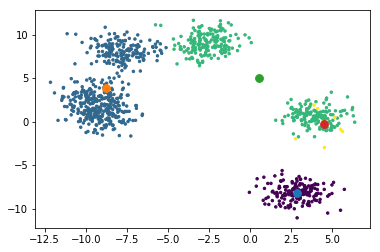

In [36]:
plt.scatter(X[:,0],X[:,1],s= 6,c=model.labels_)
for cluster in model.clusters:
    plt.scatter(cluster.center[0],cluster.center[1],s=60)

clusters will change corresponds to their centers

In [38]:
error

[1803488.8413095723]